In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
import shap
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import EasyEnsembleClassifier
from scipy import stats


In [6]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


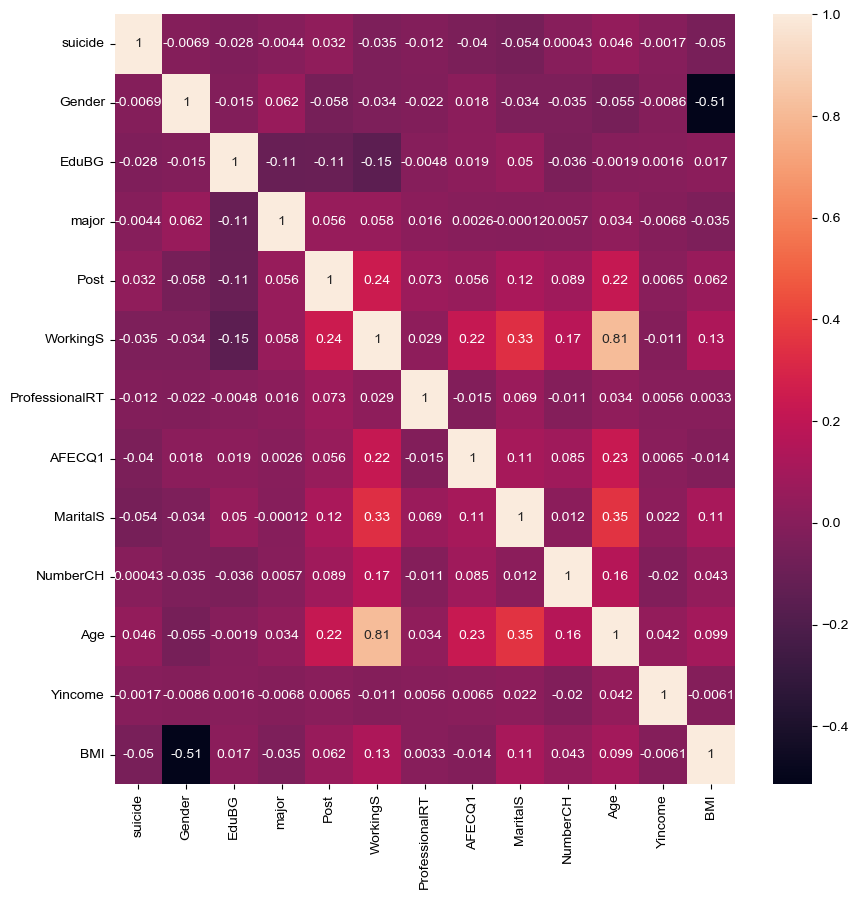

In [21]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-最近一周自杀意念-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
corr_matrix = Dataset.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True)

plt.show()

# plt.boxplot(Dataset['Yincome'])
# plt.show()
# median_income = Dataset['Yincome'].median()
# mean_income = Dataset['Yincome'].mean()
# print(median_income)
# print(mean_income)
# # 创建一个条形图来显示这两个值
# plt.bar(['Median', 'Mean'], [median_income, mean_income])
# plt.title('Median and Mean of Yincome')
# plt.ylabel('Value')
# plt.show()

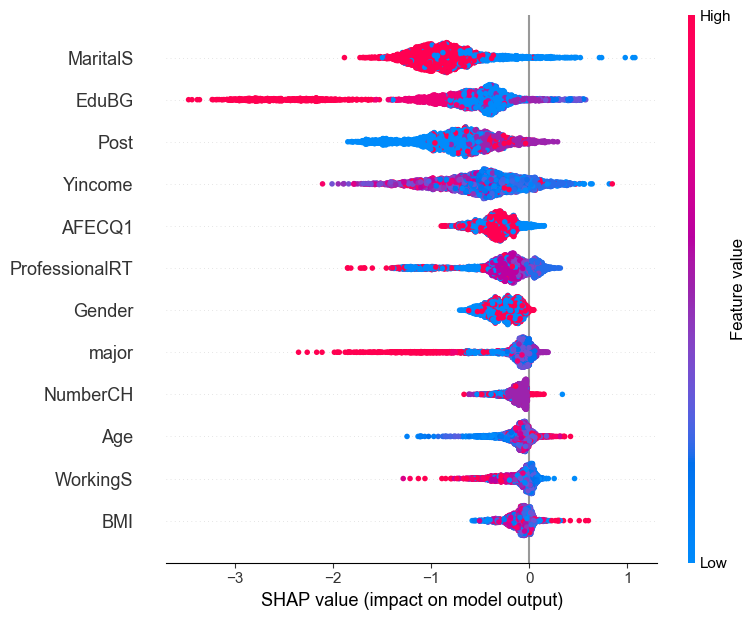

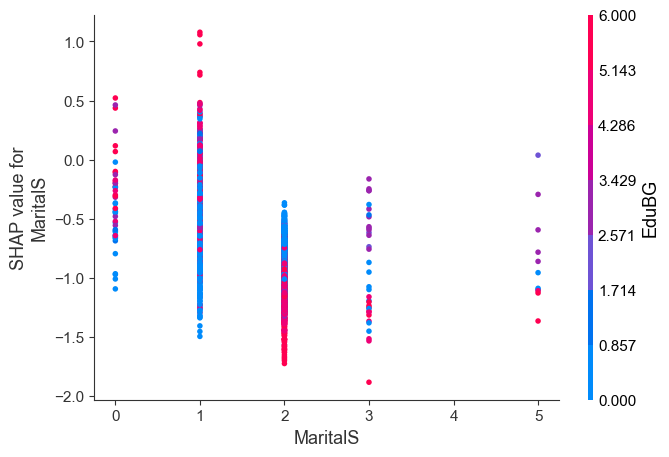

           feature  importance
7         MaritalS    0.857391
1            EduBG    0.802740
3             Post    0.708137
10         Yincome    0.522294
6           AFECQ1    0.335834
5   ProfessionalRT    0.293099
0           Gender    0.266609
2            major    0.227787
8         NumberCH    0.132165
9              Age    0.127382
4         WorkingS    0.126210
11             BMI    0.106992


In [8]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-最近一周自杀意念-人口学信息数据.csv"
Dataset = pd.read_csv(fpath)
y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

feature_names = np.array(x.columns)
names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

weights = np.sum(y_train == 0) / np.sum(y_train == 1)

# rfc = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=2,min_samples_split=2,random_state=random_state)
rfc = xgb.XGBClassifier(n_estimators=100,scale_pos_weight=weights,seed=1,learning_rate=0.04 )

rfc.fit(x_train_resampled, y_train_resampled)
# 使用内联模式显示图像
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

class_names = [
     'No Suicidal Ideation',
     'Suicidal Ideation'
]
# plt.subplots()
# shap.summary_plot(shap_values, x_test, feature_names=feature_names, class_names=class_names, max_display=20, plot_type="bar")
shap.summary_plot(shap_values, x_test)
shap.dependence_plot("MaritalS", shap_values, x_test)

# Obtain absolute SHAP values for each feature
importances = np.abs(shap_values).mean(0)

# Match feature names with their respective importances
feature_importances = pd.DataFrame(list(zip(x_test.columns, importances)), 
                                   columns=['feature', 'importance'])

# Sort the DataFrame by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)




重采样后的类别分布： Counter({0.0: 7586, 1.0: 7503})
weight:28.30597014925373
Balanced Accuracy Score :  0.670092055012252
预测数据: Counter({0.0: 3269, 1.0: 97})
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      3269
         1.0       0.06      0.62      0.11        97

    accuracy                           0.72      3366
   macro avg       0.52      0.67      0.47      3366
weighted avg       0.96      0.72      0.81      3366

Recall: 0.72 Accuracy: 71.87


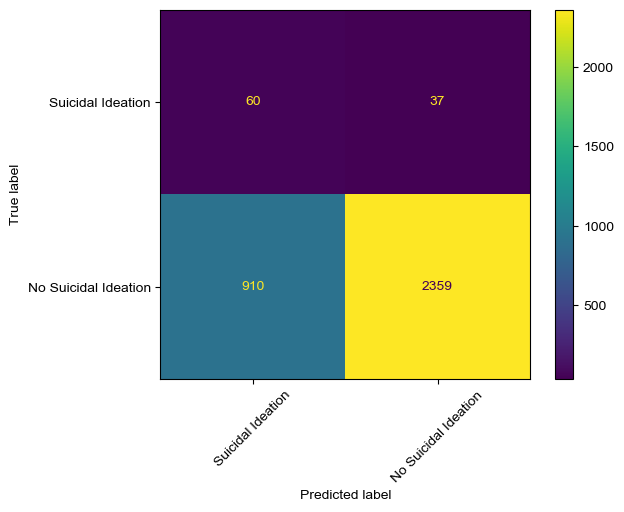

F1:  0.8120739087044057
Accuracy:  0.9799201915893875
Precision:  0.997566057049861
Recall:  0.9620023095713968
F1 score:  0.9782547610258175


In [37]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-最近一周自杀意念-人口学信息数据.csv"
data = pd.read_csv(fpath)
random_state=42
y = data['suicide']
X = data.drop(labels=['suicide','AFECQ1','ProfessionalRT','Gender','major','NumberCH','Age','WorkingS','BMI','Yincome'], axis=1)

# scaler = StandardScaler(with_mean=False, with_std=True)
# X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# 过采样
smote = ADASYN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))
weights = np.sum(y_train == 0) / np.sum(y_train == 1)
print("weight:" + str(weights))
# brfc = RandomForestClassifier(class_weight={0:1, 1:10},random_state=random_state, n_estimators=100)
# brfc = xgb.XGBClassifier(n_estimators=100,scale_pos_weight=weights,seed=1,learning_rate=0.03 )
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
# brfc = EasyEnsembleClassifier(random_state=42)

brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)
balanced_acc_score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score : ", balanced_acc_score)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

label_dict = {
    1: 'Suicidal Ideation',
    0: 'No Suicidal Ideation'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()

# 获取feature importance
# feature_names = np.array(x.columns)

# names = x.columns
# cols = list(names)
# plt.figure(figsize=(15, 5))
# plt.bar(range(len(names)), brfc.feature_importances_)
# plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
# plt.title('Feature importance', fontsize=14)
# plt.show()

# xgb.plot_importance(brfc)

print('F1: ', f1)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

cv_results = cross_validate(brfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)

# Print the average score for each metric
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 score: ", cv_results['test_f1'].mean())


